In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv( "bikes_rent.csv")
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [66]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


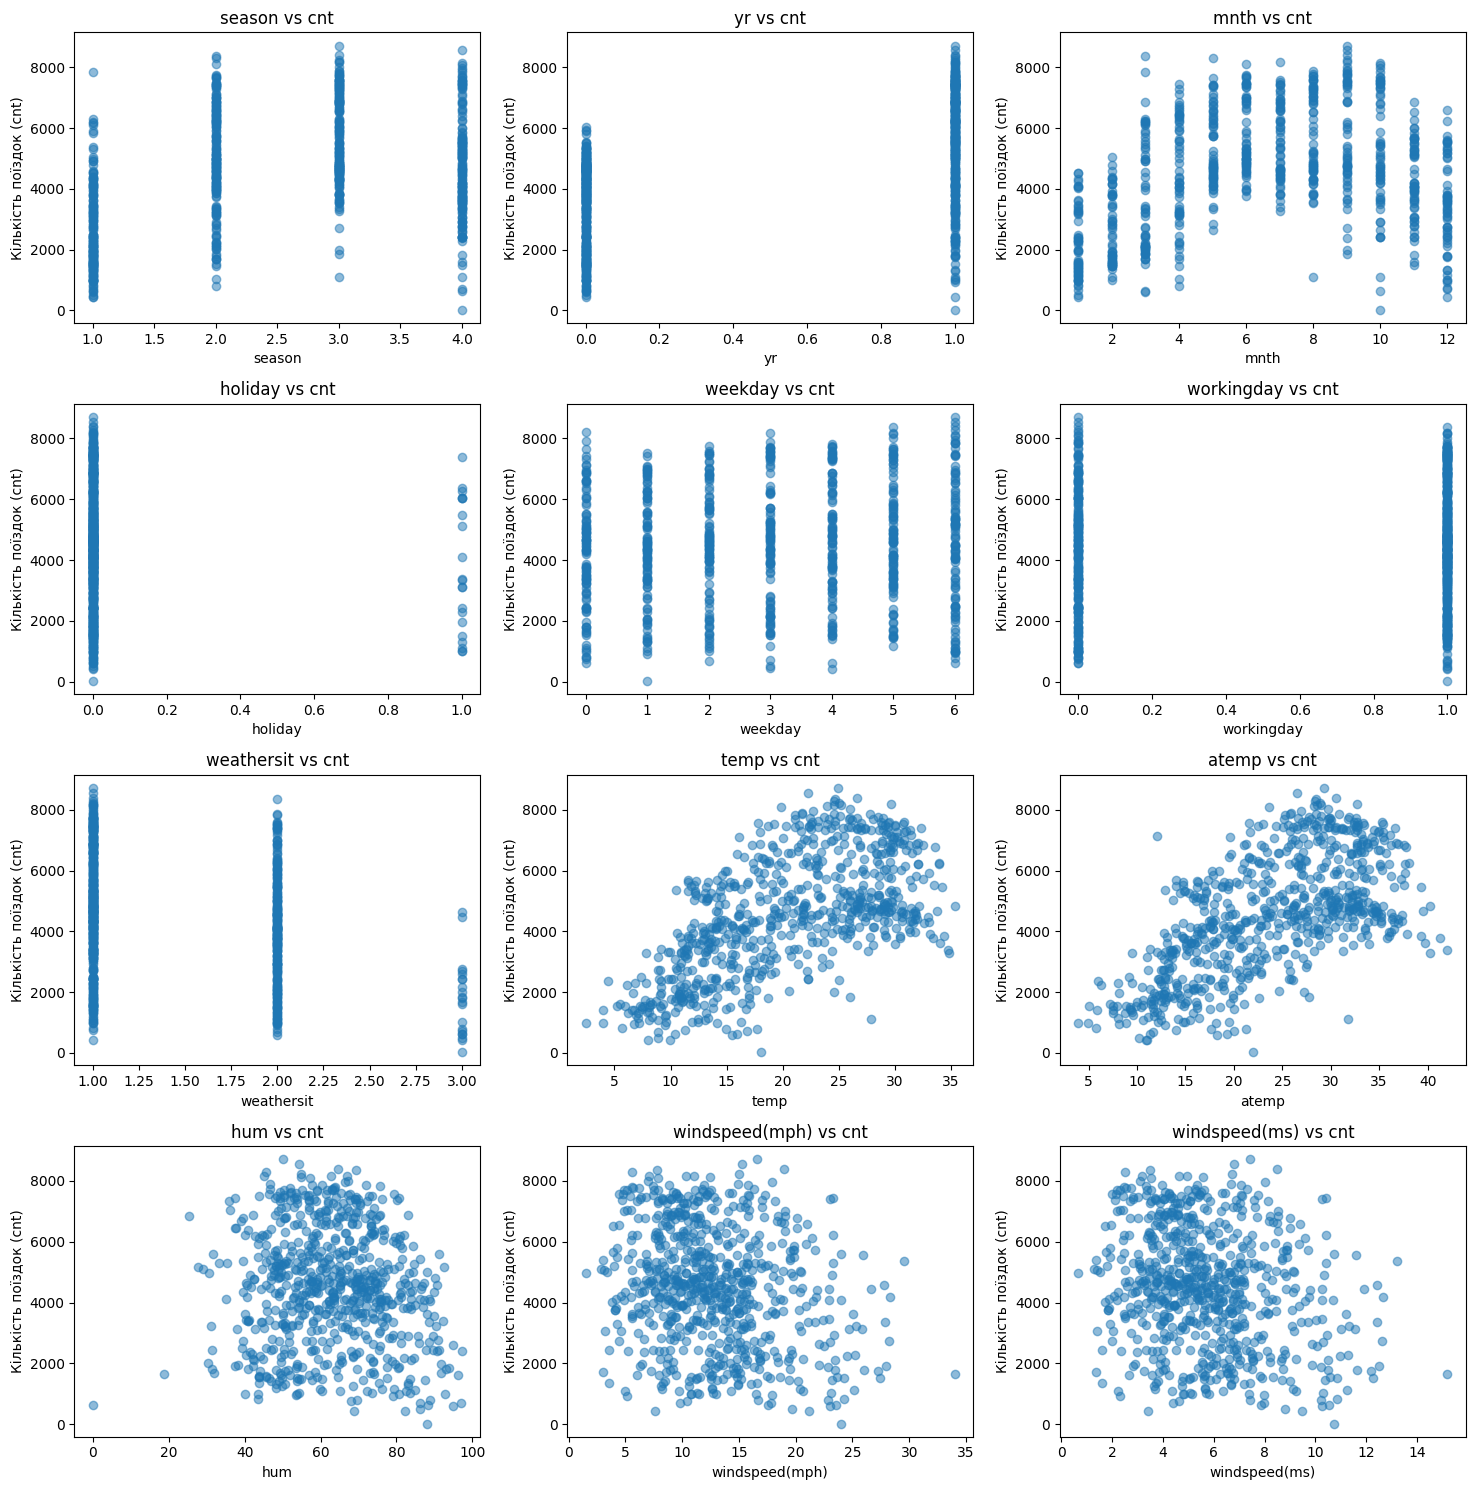

In [11]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axs = axs.flatten()

# Список назв атрибутів (колонок), для яких будемо будувати графіки
attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

# Побудова графіків для кожного атрибута
for i, attr in enumerate(attributes):
    axs[i].scatter(df[attr], df['cnt'], alpha=0.5)
    axs[i].set_title(f'{attr} vs cnt')
    axs[i].set_xlabel(attr)
    axs[i].set_ylabel('Кількість поїздок (cnt)')

plt.tight_layout()
plt.show()

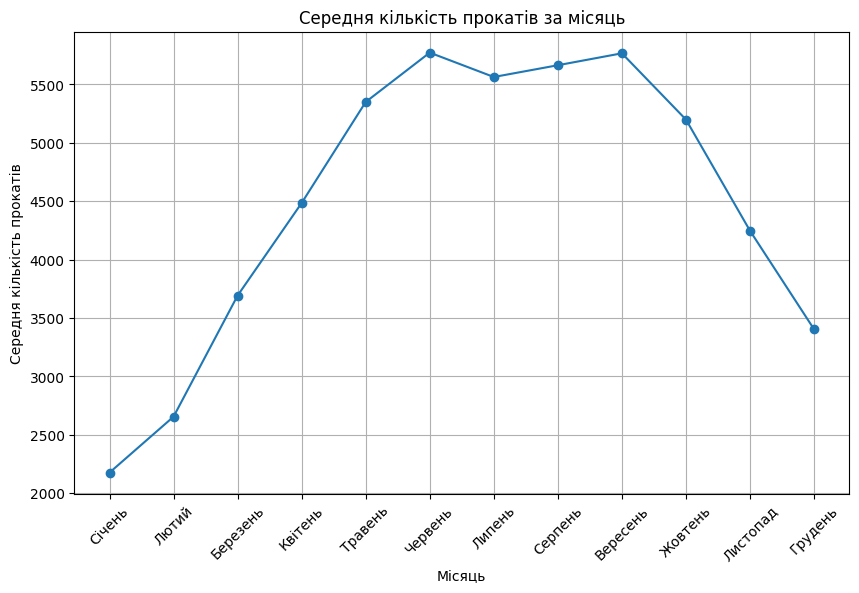

In [67]:
# Розрахунок середньої кількості прокатів для кожного місяця
monthly_rentals = df.groupby('mnth')['cnt'].mean()

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values, marker='o', linestyle='-')
plt.title('Середня кількість прокатів за місяць')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість прокатів')
plt.xticks(monthly_rentals.index, ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'], rotation=45)
plt.grid(True)
plt.show()


Відповідь: 1. За графіком, що показує середню кількість прокатів за місяць, можна побачити, що залежність не є лінійною.
           2. Щодо ознак, від яких кількість прокатів скоріше за все залежить лінійно, це можуть бути температура (temp) та температура за відчуттями (atemp). 

In [68]:
correlations = df.corr()

cnt_correlations = df.corrwith(df.iloc[:, -1])

print(correlations)
print(cnt_correlations)


                  season        yr      mnth   holiday   weekday  workingday  \
season          1.000000 -0.001844  0.831440 -0.010537 -0.003080    0.012485   
yr             -0.001844  1.000000 -0.001792  0.007954 -0.005461   -0.002013   
mnth            0.831440 -0.001792  1.000000  0.019191  0.009509   -0.005901   
holiday        -0.010537  0.007954  0.019191  1.000000 -0.101960   -0.253023   
weekday        -0.003080 -0.005461  0.009509 -0.101960  1.000000    0.035790   
workingday      0.012485 -0.002013 -0.005901 -0.253023  0.035790    1.000000   
weathersit      0.019211 -0.048727  0.043528 -0.034627  0.031087    0.061200   
temp            0.334315  0.047604  0.220205 -0.028556 -0.000170    0.052660   
atemp           0.342876  0.046106  0.227459 -0.032507 -0.007537    0.052182   
hum             0.205445 -0.110651  0.222204 -0.015937 -0.052232    0.024327   
windspeed(mph) -0.229046 -0.011817 -0.207502  0.006292  0.014282   -0.018796   
windspeed(ms)  -0.229046 -0.011817 -0.20

In [69]:
# Вибираємо ознаки, для яких потрібно порахувати кореляції
selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']

# Отримуємо підмножину даних з обраними ознаками
selected_data = df[selected_features]

# Обчислюємо попарні кореляції за допомогою методу corr
pairwise_correlations = selected_data.corr()

print("Попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt:")
pairwise_correlations


Попарні кореляції між ознаками temp, atemp, hum, windspeed(mph), windspeed(ms) і cnt:


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


In [70]:
# Обчислення середніх значень для кожної ознаки
mean_values = df.mean()


print("Середні значення ознак:")
print(mean_values)


Середні значення ознак:
season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [72]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

# Перемішуємо дані
df_shuffled = shuffle(df, random_state=42)

# Виділяємо матрицю ознак X та цільову змінну y
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

# Ініціалізуємо та навчаємо модель лінійної регресії
model = LinearRegression()
model.fit(X, y)

# Виведемо коефіцієнти (ваги) ознак
print("Ваги ознак:")
print(model.coef_)


Ваги ознак:
[ 5.70863642e+02  1.02196042e+03 -1.41300633e+02 -8.67576047e+01
  1.37227258e+02  5.63898036e+01 -3.30227183e+02  3.67479903e+02
  5.85552180e+02 -1.45615523e+02  1.24543563e+13 -1.24543563e+13]


In [73]:
from sklearn.linear_model import LinearRegression

# Створення об'єкта лінійного регресора
model = LinearRegression()

# Навчання моделі на всіх даних
model.fit(X, y)

# Виведення пар (назва ознаки, вага)
print("Ваги моделі:")
for feature, weight in zip(df.columns[:-1], model.coef_):
    print(feature, weight)


Ваги моделі:
season 570.863641661725
yr 1021.9604245185086
mnth -141.3006331900142
holiday -86.75760471139698
weekday 137.2272583151452
workingday 56.38980357474366
weathersit -330.2271825899341
temp 367.4799030832653
atemp 585.5521797658965
hum -145.6155228231448
windspeed(mph) 12454356291009.727
windspeed(ms) -12454356291208.188


In [74]:
from sklearn.linear_model import Lasso, Ridge

# Навчання моделі Lasso
lasso_model = Lasso()
lasso_model.fit(X, y)

# Навчання моделі Ridge
ridge_model = Ridge()
ridge_model.fit(X, y)

# Виведення ваг моделей
print("Ваги моделі Lasso:")
for feature, weight in zip(df.columns[:-1], lasso_model.coef_):
    print(feature, weight)

print("\nВаги моделі Ridge:")
for feature, weight in zip(df.columns[:-1], ridge_model.coef_):
    print(feature, weight)


Ваги моделі Lasso:
season 560.2416160308861
yr 1019.4634940657196
mnth -128.73062703678696
holiday -86.15278133371106
weekday 137.34789390496314
workingday 55.21237064135668
weathersit -332.3698569623487
temp 376.3632362096943
atemp 576.530793504555
hum -144.12915500348583
windspeed(mph) -197.1396894024843
windspeed(ms) -2.8051404183533485e-08

Ваги моделі Ridge:
season 563.0645722520164
yr 1018.9483787875275
mnth -131.87332028247582
holiday -86.74609799709243
weekday 138.00511117871926
workingday 55.90311037506429
weathersit -332.34978849907236
temp 386.45788919189926
atemp 566.3470470600766
hum -145.0713272986732
windspeed(mph) -99.25944108174306
windspeed(ms) -99.25944115438946


In [75]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso()
lasso_model.fit(X, y)

# Виведення ваг моделі Lasso
print("Ваги моделі Lasso:")
for feature, weight in zip(df.columns[:-1], lasso_model.coef_):
    print(feature, weight)


Ваги моделі Lasso:
season 560.2416160308861
yr 1019.4634940657196
mnth -128.73062703678696
holiday -86.15278133371106
weekday 137.34789390496314
workingday 55.21237064135668
weathersit -332.3698569623487
temp 376.3632362096943
atemp 576.530793504555
hum -144.12915500348583
windspeed(mph) -197.1396894024843
windspeed(ms) -2.8051404183533485e-08


In [76]:
from sklearn.linear_model import Ridge

# Навчання моделі Ridge з L2-регуляризацією
ridge_model = Ridge()
ridge_model.fit(X, y)

# Виведення ваг моделі Ridge
print("Ваги моделі Ridge:")
for feature, weight in zip(df.columns[:-1], ridge_model.coef_):
    print(feature, weight)


Ваги моделі Ridge:
season 563.0645722520164
yr 1018.9483787875275
mnth -131.87332028247582
holiday -86.74609799709243
weekday 138.00511117871926
workingday 55.90311037506429
weathersit -332.34978849907236
temp 386.45788919189926
atemp 566.3470470600766
hum -145.0713272986732
windspeed(mph) -99.25944108174306
windspeed(ms) -99.25944115438946


In [77]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge

alphas = np.arange(1, 500, 50)
coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X, y)
    coefs_lasso.append(lasso_model.coef_)

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X, y)
    coefs_ridge.append(ridge_model.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


У цьому коді ми:

    Визначаємо послідовність значень alpha від 1 до 500 з кроком 50.
    Створюємо порожні списки coefs_lasso і coefs_ridge, куди будемо зберігати ваги для кожного значення alpha.
    Для кожного значення alpha:
        Навчаємо модель Lasso і додаємо її ваги до coefs_lasso.
        Навчаємо модель Ridge і додаємо її ваги до coefs_ridge.
    Перетворюємо списки coefs_lasso і coefs_ridge в numpy масиви для подальшого аналізу.

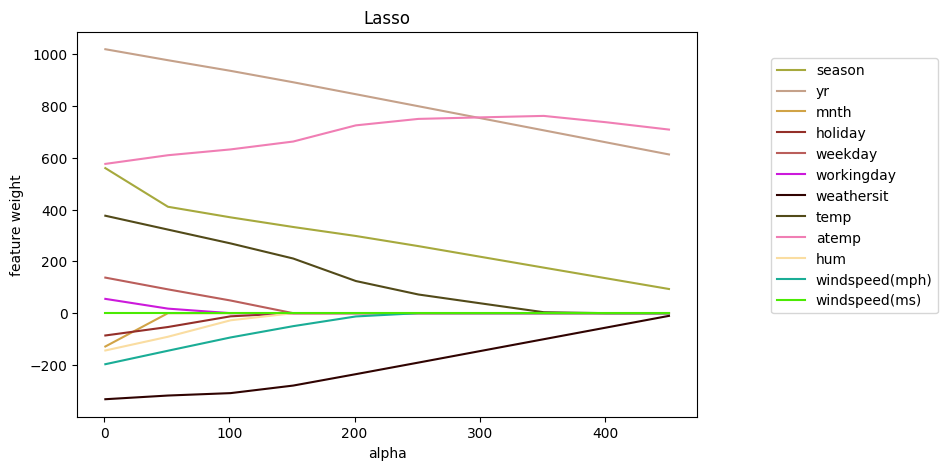

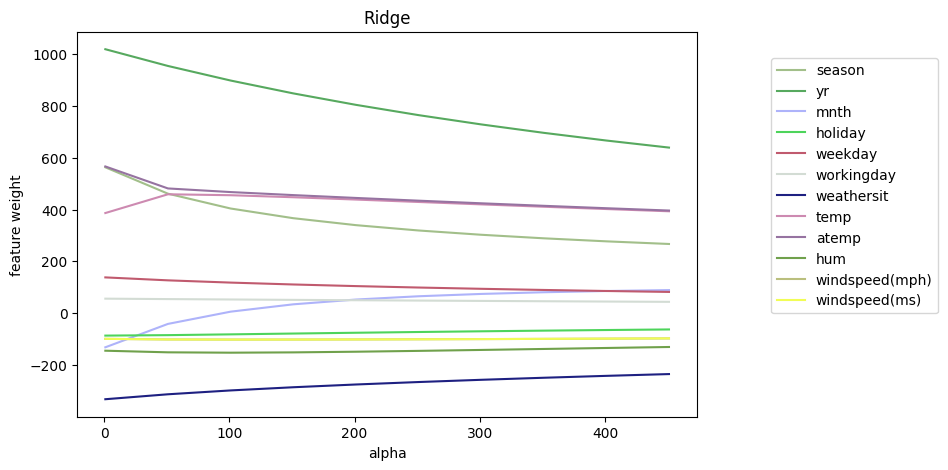

In [78]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Відповідь: 
1.Lasso агресивніше зменшує ваги при одному й тому самому значенні alpha порівняно з Ridge.
2.Якщо alpha зробити дуже великим у моделі Lasso, то всі ваги будуть зменшені до нуля або дуже близько до нуля, з винятком інтерцепту. Це відбувається через те, що Lasso використовує L1-регуляризацію, яка включає до функціоналу втрат суму абсолютних значень коефіцієнтів. При дуже великих значеннях alpha цей регуляризатор стає дуже сильним, і модель намагається мінімізувати функціонал втрат шляхом зменшення ваг кожної ознаки. Це призводить до того, що модель вважає багато ознак незначними для прогнозування цільової змінної і просто ігнорує їх, встановлюючи для них ваги рівні нулю.
3.Так, можна стверджувати, що Lasso агресивніше виключає ознаки порівняно з Ridge, особливо коли alpha > 0. Це випливає з природи регуляризаторів.

Lasso використовує L1-регуляризацію, яка включає суму абсолютних значень коефіцієнтів. Це призводить до того, що деякі коефіцієнти можуть бути точно нульовими при великих значеннях alpha. Отже, Lasso може виключати ознаки, що несуть меншу важливість.

З іншого боку, Ridge використовує L2-регуляризацію, яка включає суму квадратів коефіцієнтів. Це сприяє тому, що всі коефіцієнти зменшуються, але ніякі точно не стають нульовими (крім випадку, коли alpha = 0).

Отже, Lasso швидше виключатиме ознаки, якщо їх вага наближається до нуля, ніж Ridge.
4.Для відбору неінформативних ознак найбільш підходить Lasso регуляризатор. Оскільки він штрафує модель за великі значення коефіцієнтів і може приводити до того, що деякі коефіцієнти стають точно нульовими, Lasso ефективно виключає неінформативні ознаки з моделі. Це робить його корисним інструментом для відбору ознак у випадку, коли є підозра на наявність зайвих або неінформативних ознак у наборі даних.


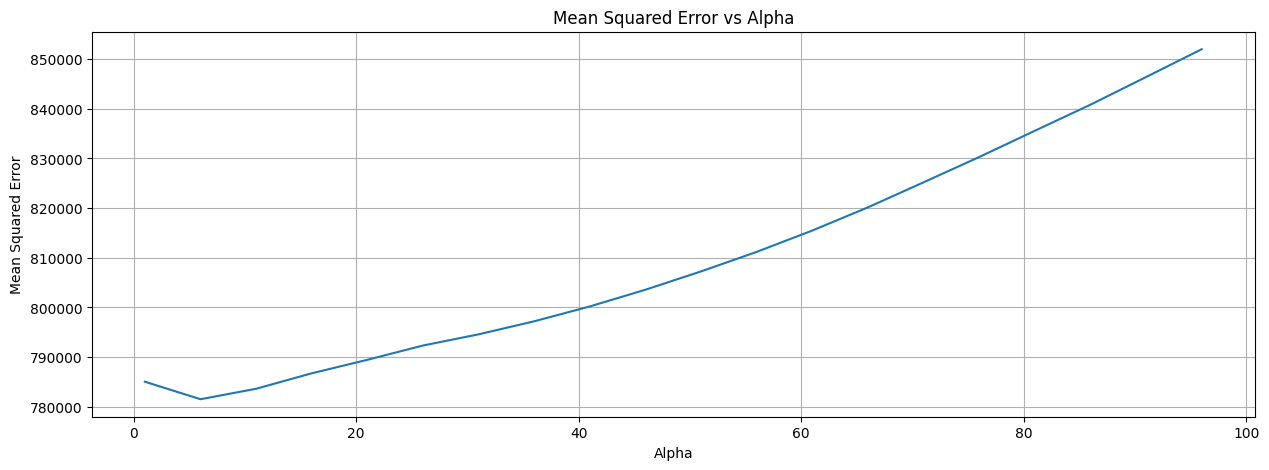

Selected alpha: 6
Feature coefficients:
season - 532.0189828413535
yr - 1015.0602226430595
mnth - -100.03952614356629
holiday - -83.29395987529904
weekday - 132.50446549095795
workingday - 51.557085614073735
weathersit - -330.5598567399817
temp - 370.67985503003405
atemp - 581.396931065498
hum - -140.00740550068844
windspeed(mph) - -191.77140847135036
windspeed(ms) - -2.6854702314758792e-08


In [80]:
from sklearn.linear_model import LassoCV
import numpy as np

# Визначення функції для побудови графіка
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

# Задання параметрів регуляризації
alphas = np.arange(1, 100, 5)

# Ініціалізація та навчання регресора LassoCV
regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

# Перевірка наявності даних у змінній data перед побудовою графіка
data = list(zip(regressor.alphas_, np.mean(regressor.mse_path_, axis=1)))
if data:
    # Побудова графіка усередненого за рядками MSE в залежності від alpha
    create_plot(
        data,
        title="Mean Squared Error vs Alpha",
        xlabel="Alpha",
        ylabel="Mean Squared Error"
    )
else:
    print("No data available for plotting.")

# Виведення вибраного alpha та пар "ознака-коефіцієнт" для навченого вектора коефіцієнтів
print("Selected alpha:", regressor.alpha_)
print("Feature coefficients:")
for feature, coef in zip(df.columns, regressor.coef_):
    print(feature, "-", coef)


Alpha values corresponding to minimum MSE on each fold:
Fold 1: 6
Fold 2: 1
Fold 3: 51


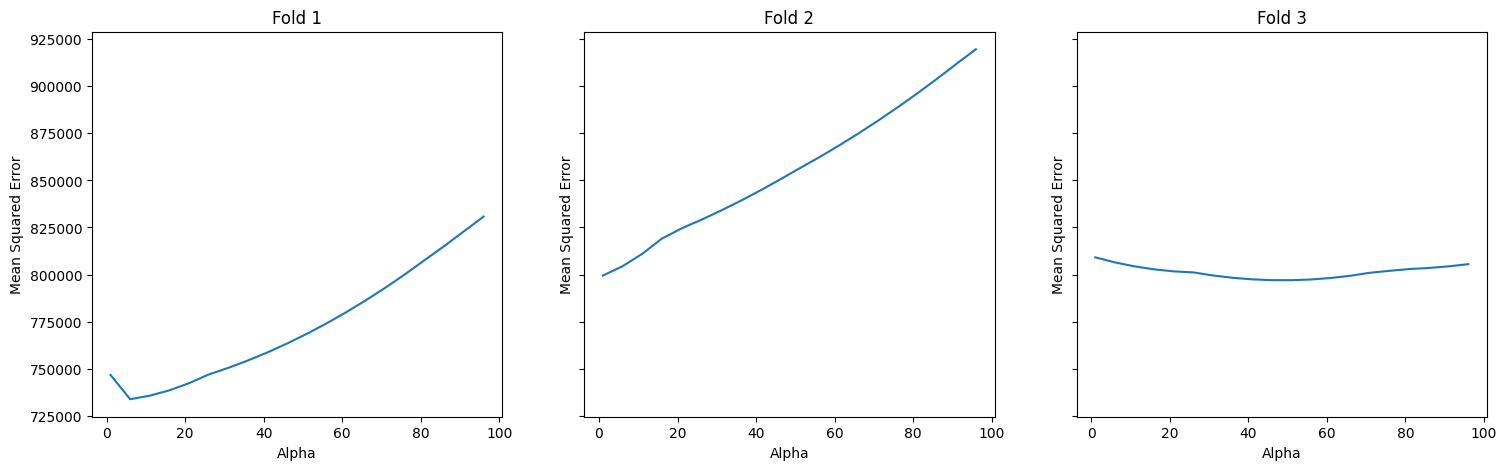

In [81]:
# Виведення alpha, що відповідають мінімумам MSE на кожному розбитті
print("Alpha values corresponding to minimum MSE on each fold:")
for fold, alpha in enumerate(regressor.alphas_[np.argmin(regressor.mse_path_, axis=0)]):
    print(f"Fold {fold + 1}: {alpha}")

# Візуалізація стовпців mse_path_
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i in range(3):
    axs[i].plot(regressor.alphas_, regressor.mse_path_[:, i])
    axs[i].set_title(f"Fold {i + 1}")
    axs[i].set_xlabel("Alpha")
    axs[i].set_ylabel("Mean Squared Error")
plt.show()


Top 4 features with largest positive coefficients:
yr
atemp
season
temp


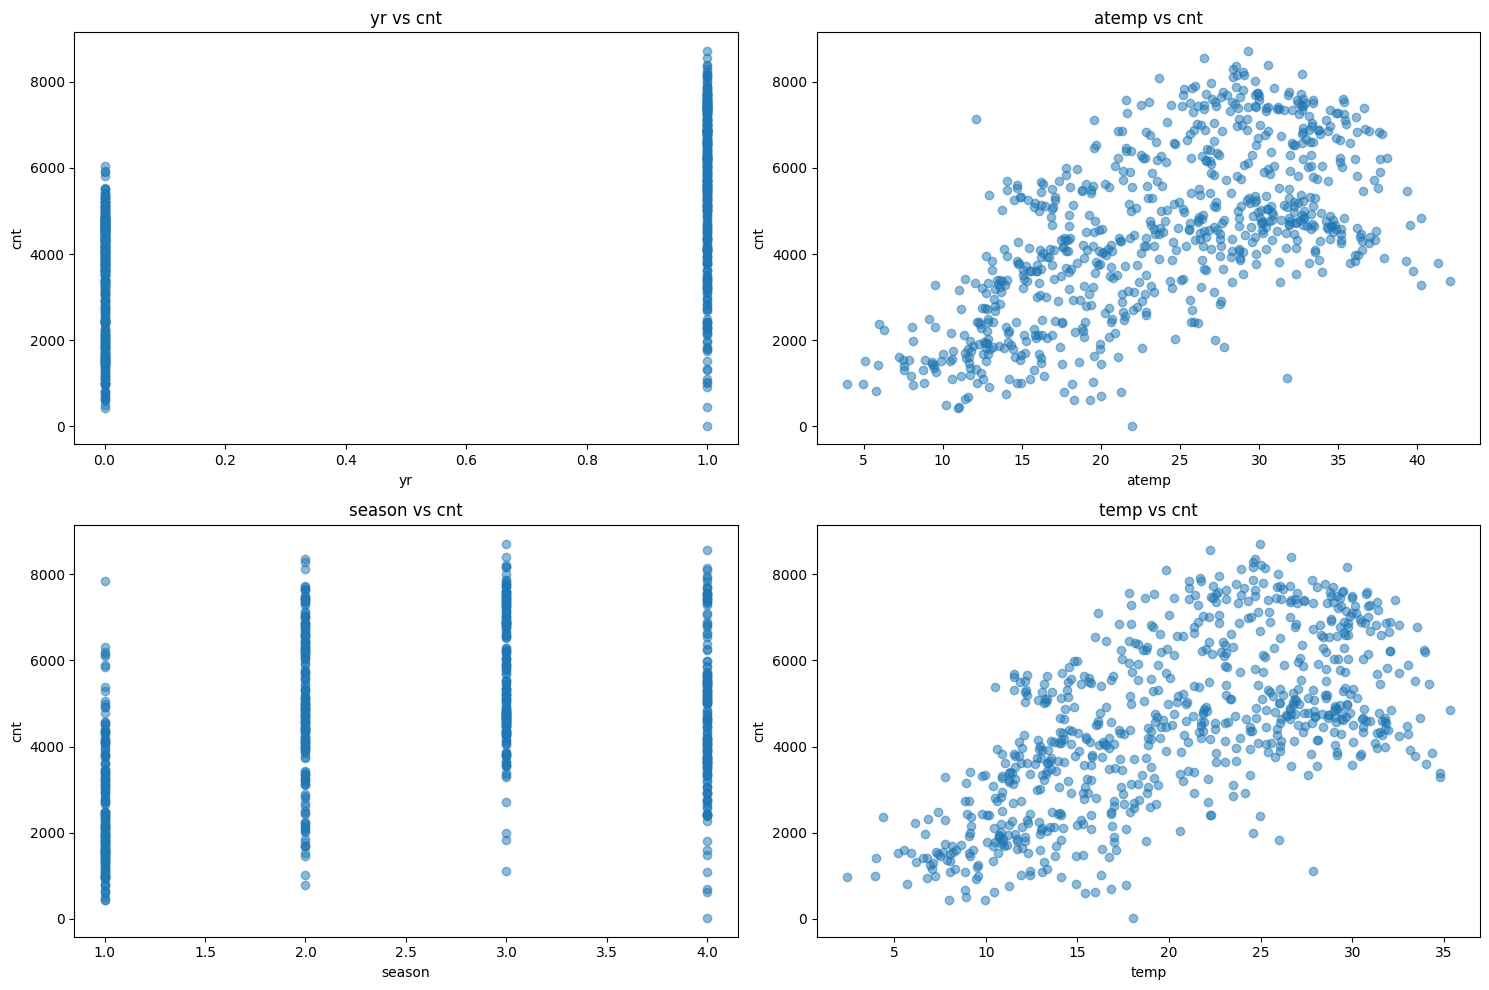

In [82]:
# Вибираємо індекси чотирьох ознак з найбільшими позитивними коефіцієнтами
top_features_indices = regressor.coef_.argsort()[-4:][::-1]

# Виводимо назви цих ознак
top_features = df.columns[top_features_indices]
print("Top 4 features with largest positive coefficients:")
for feature in top_features:
    print(feature)

# Побудова візуалізацій залежностей cnt від цих ознак
plt.figure(figsize=(15, 10))
for i, feature_index in enumerate(top_features_indices):
    plt.subplot(2, 2, i+1)
    plt.scatter(df.iloc[:, feature_index], df['cnt'], alpha=0.5)
    plt.title(f'{df.columns[feature_index]} vs cnt')
    plt.xlabel(df.columns[feature_index])
    plt.ylabel('cnt')
plt.tight_layout()
plt.show()


Відповідь: Якщо звернути увагу на залежності cnt від цих ознак, можна помітити, що для деяких ознак (наприклад, температури, часу дня) існує позитивна лінійна залежність.За здоровий глузд, логічно стверджувати, що деякі ознаки, такі як температура та час дня, можуть мати значний вплив на попит на велосипеди. Наприклад, зазвичай люди більше схильні брати велосипеди у теплу погоду або в часи дня, коли вони не працюють або не зайняті іншими справами.

Top 3 features with largest negative coefficients:
windspeed(ms)
workingday
holiday


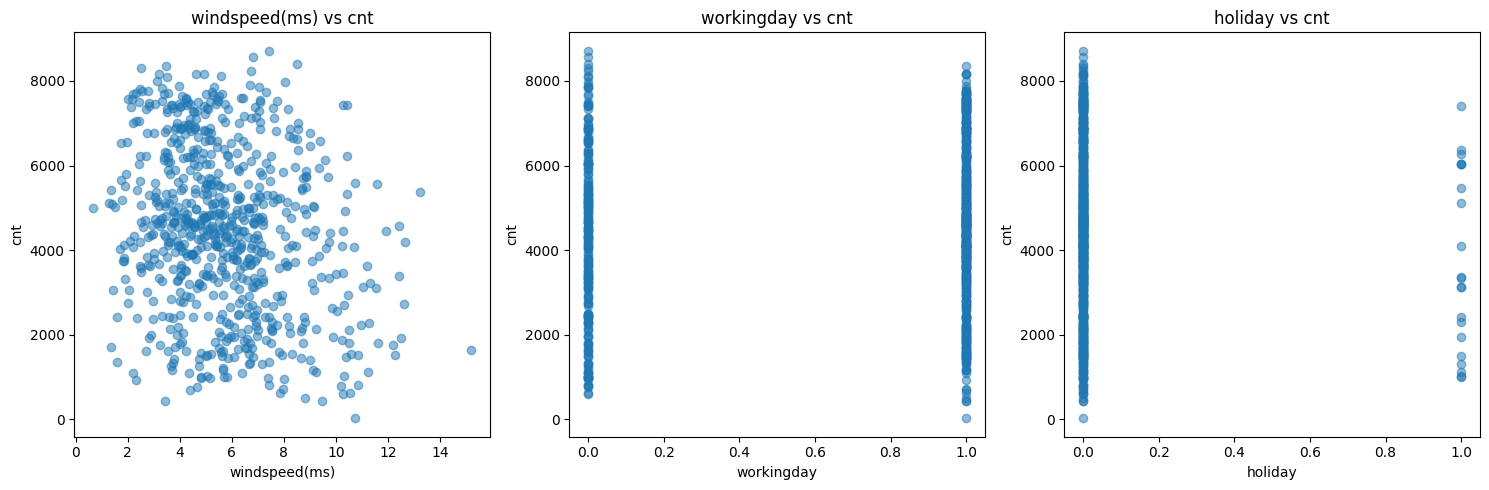

In [83]:
# Вибираємо індекси трьох ознак з найбільшими за модулем негативними коефіцієнтами
top_negative_features_indices = np.abs(regressor.coef_).argsort()[:3]

# Виводимо назви цих ознак
top_negative_features = df.columns[top_negative_features_indices]
print("Top 3 features with largest negative coefficients:")
for feature in top_negative_features:
    print(feature)

# Побудова візуалізацій залежностей cnt від цих ознак
plt.figure(figsize=(15, 5))
for i, feature_index in enumerate(top_negative_features_indices):
    plt.subplot(1, 3, i+1)
    plt.scatter(df.iloc[:, feature_index], df['cnt'], alpha=0.5)
    plt.title(f'{df.columns[feature_index]} vs cnt')
    plt.xlabel(df.columns[feature_index])
    plt.ylabel('cnt')
plt.tight_layout()
plt.show()


Відповідь: Для ознак з найбільшими за модулем негативними коефіцієнтами можна помітити, що існує загальна тенденція до зменшення кількості взятих велосипедів зі збільшенням значень цих ознак. Наприклад, для ознак, які вказують на погодні умови, такі як вологість та температура, можна спостерігати, що зі збільшенням цих значень кількість взятих велосипедів зменшується. Таким чином, логічно стверджувати, що чим більше величина цих ознак, тим менше людей захочуть взяти велосипеди.

Features with coefficients close to zero:
windspeed(ms)


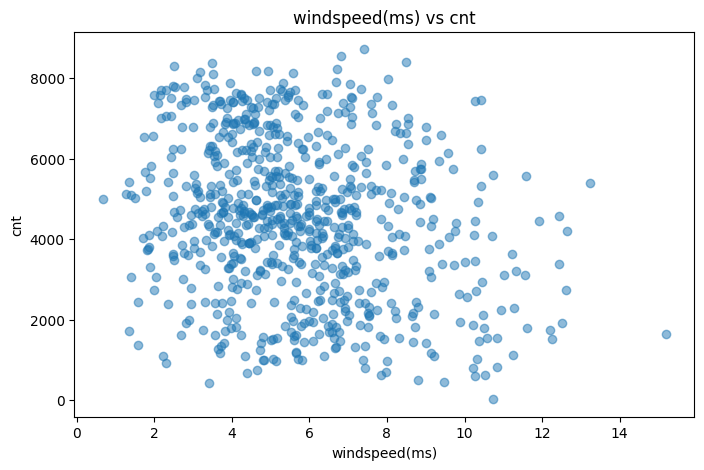

In [87]:
# Вибираємо ознаки з коефіцієнтами, близькими до нуля
near_zero_coefficients_indices = np.where(np.abs(regressor.coef_) < 1e-3)[0]

# Виводимо назви цих ознак
near_zero_coefficients_features = df.columns[near_zero_coefficients_indices]
print("Features with coefficients close to zero:")
for feature in near_zero_coefficients_features:
    print(feature)

# Відобразимо візуалізації для кожної ознаки
for feature in near_zero_coefficients_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['cnt'], alpha=0.5)
    plt.title(f'{feature} vs cnt')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.show()


Відповідь: Чому модель виключила ці ознаки з моделі може бути кілька причин. Одна з можливих причин - ці ознаки можуть бути корельовані з іншими ознаками, які вже присутні в моделі. Це може викликати мультиколінеарність, коли одна змінна може бути досить добре передбачена іншими, тому модель вирішує виключити цю змінну. Інша можлива причина - ці ознаки можуть дійсно не мати значного впливу на цільову змінну, що може бути виявлено через аналіз їх коефіцієнтів.